In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('bigdatamart_Train.csv')  # read the data
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(8523, 12)
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_I

As we see in Item_Weight & Outlet_Size columns null values are present so lets treat them frist by using mean & mode method

In [4]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(8523, 12)


No duplicates are found lets treat the null values

In [5]:
# For Item_Weight we are using mean method as our values in numerical form 
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [6]:
# For Outlet_Size we are using mode method as our values in str form 
data["Outlet_Size"].mode()

0    Medium
dtype: object

In [7]:
data["Outlet_Size"]=data["Outlet_Size"].replace(np.NaN,"Medium")

In [8]:
# Now lets check foll null values again 
print(data.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Now all the null values treated well now lets understand the data

In [9]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


Observations: 1) null vallues are not present 2) most of columns we have skwed data values 3)we have categorical data type(object type) 

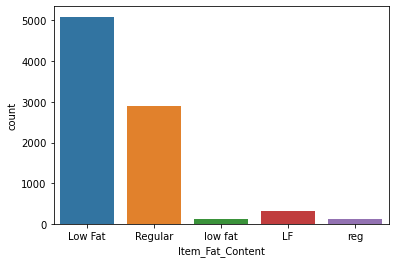

In [10]:
#plot each class frequency
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

From above graph we can see there are most of the products are lowFat products also there are two types of low fat & regular

In [11]:
# combining low Fat, Low fat and, LF
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat','reg':'Regular'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

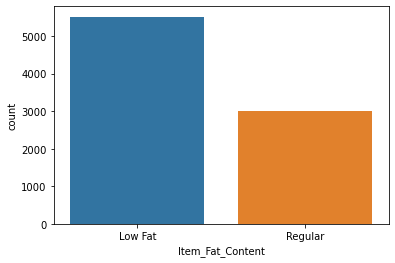

In [12]:
#plot again
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

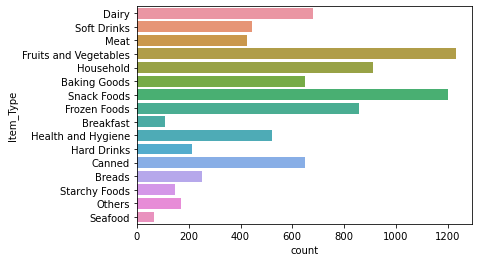

In [13]:
sns.countplot(y='Item_Type',data=data)
plt.show()

From above graph we can see there are maximum( almost 1200) items_type is fruits & vegetables and snacks foods. The least product type in the store is seafood.

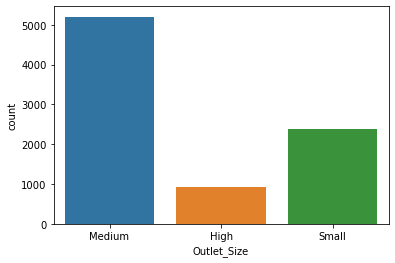

In [14]:
sns.countplot(x='Outlet_Size',data=data)
plt.show()

From above graph we can see there is maximum mediam type of outlets as compaire to small & big 

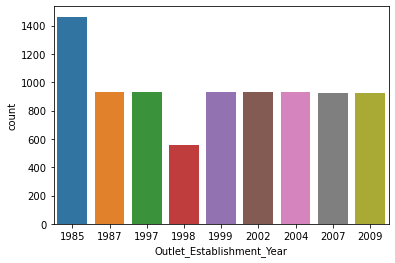

In [15]:
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

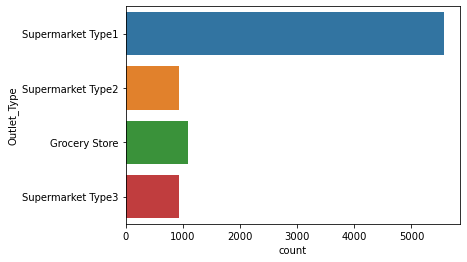

In [16]:
sns.countplot(y='Outlet_Type',data=data)
plt.show()

there are maximum Outlet_Type is supermarket type1

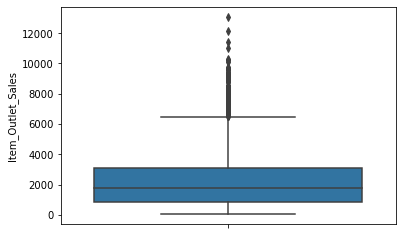

In [17]:
sns.boxplot(y='Item_Outlet_Sales',data=data)
plt.show()

WE can see there are outliers present in the outlet sales and the maximum item outlet sale is 12000

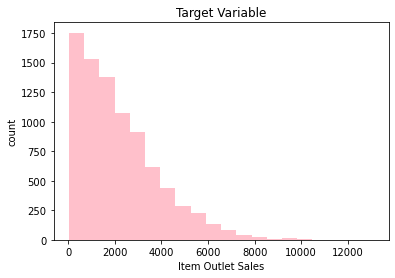

In [19]:
plt.hist(data['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

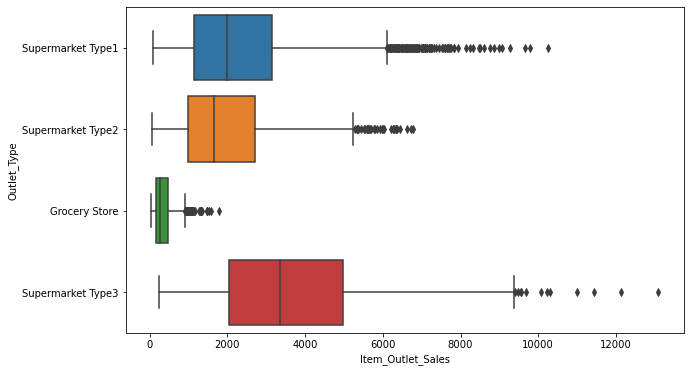

In [21]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Outlet_Type', x ='Item_Outlet_Sales', data = data)
plt.show()

We can see the maximum iteam outlest sale is in supermarket type 3 then supermarket type 1 then type2 & least sale in grocery store

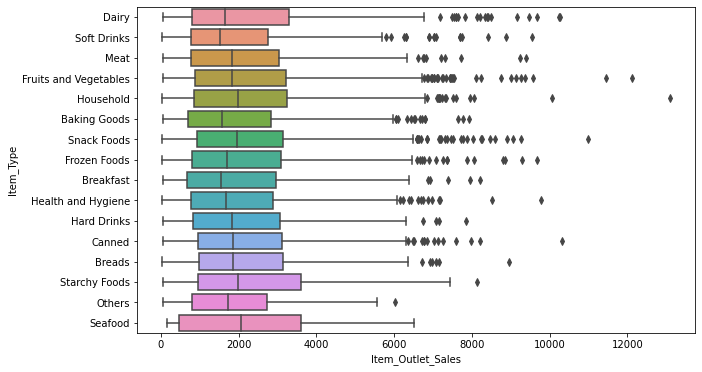

In [22]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Item_Type', x ='Item_Outlet_Sales', data = data)
plt.show()

from graph we can see almost all items types are sale in outlets

<Figure size 720x432 with 0 Axes>

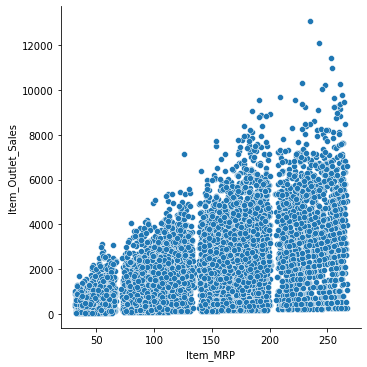

In [23]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.relplot(x ='Item_MRP', y ='Item_Outlet_Sales', data = data)
plt.show()

from above graph we can see the maximum iteam MRP the maximum sale is there

As we have lots of categorical data lets convert into numerical by using encoding tech.

In [24]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [25]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['Item_Identifier'])
pd.Series(df)
data["Item_Identifier"]=df

In [26]:
df=label.fit_transform(data['Item_Fat_Content'])
pd.Series(df)
data["Item_Fat_Content"]=df

In [27]:
df=label.fit_transform(data['Item_Type'])
pd.Series(df)
data["Item_Type"]=df

In [28]:
df=label.fit_transform(data['Outlet_Size'])
pd.Series(df)
data["Outlet_Size"]=df

In [29]:
df=label.fit_transform(data['Outlet_Identifier'])
pd.Series(df)
data["Outlet_Identifier"]=df

In [30]:
df=label.fit_transform(data['Outlet_Location_Type'])
pd.Series(df)
data["Outlet_Location_Type"]=df

In [31]:
df=label.fit_transform(data['Outlet_Type'])
pd.Series(df)
data["Outlet_Type"]=df

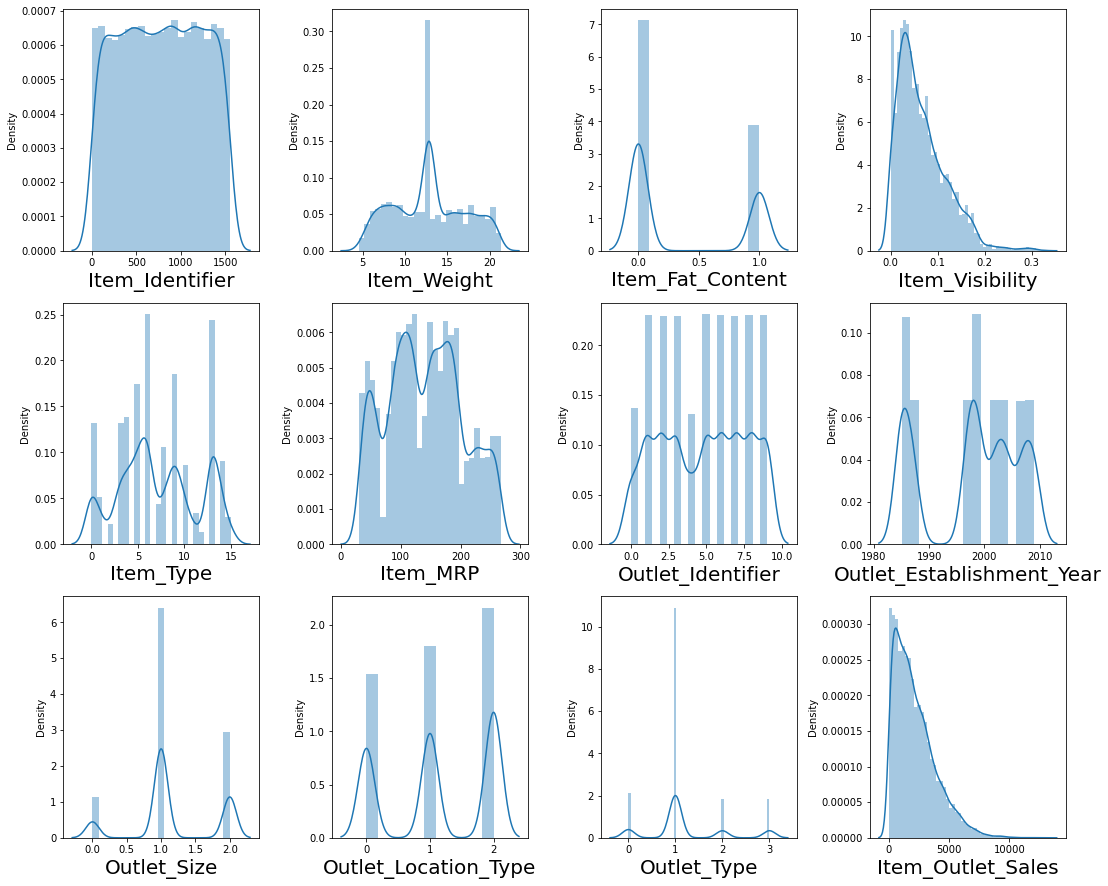

In [32]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from above graph we can see there are almost in all columns skewness is present lets check it again by data.skew method

In [33]:
# Lets check the skewness
data.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

As we know scipy.stats.skew (array, axis=0, bias=True) function calculates the skewness of the data set. skewness = 0 : normally distributed. skewness > 0 : more weight in the left tail of the distribution. skewness < 0 : more weight in the right tail of the distribution.

so from above we can see the weight of Item_Outlet_Sales & Item_Visibility is more than zero so they are right tail skewed data

Lets use advance tech. to remove this skewness using Power transformation

In [34]:
# Separate the skewed columns
df1=['Item_Outlet_Sales','Item_Visibility']

In [35]:
# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)

In [36]:
data[df1] # rechek data

,Item_Outlet_Sales,Item_Visibility
0,0.985078,-1.146886
1,-1.218135,-1.037100
2,0.220360,-1.122375
3,-0.835183,-1.745551
4,-0.566616,-1.745551
...,...,...
8518,0.573946,0.020310
8519,-1.062855,-0.221388
8520,-0.393044,-0.542979
8521,0.070669,1.459990


In [37]:
data.shape # recheck 

(8523, 12)

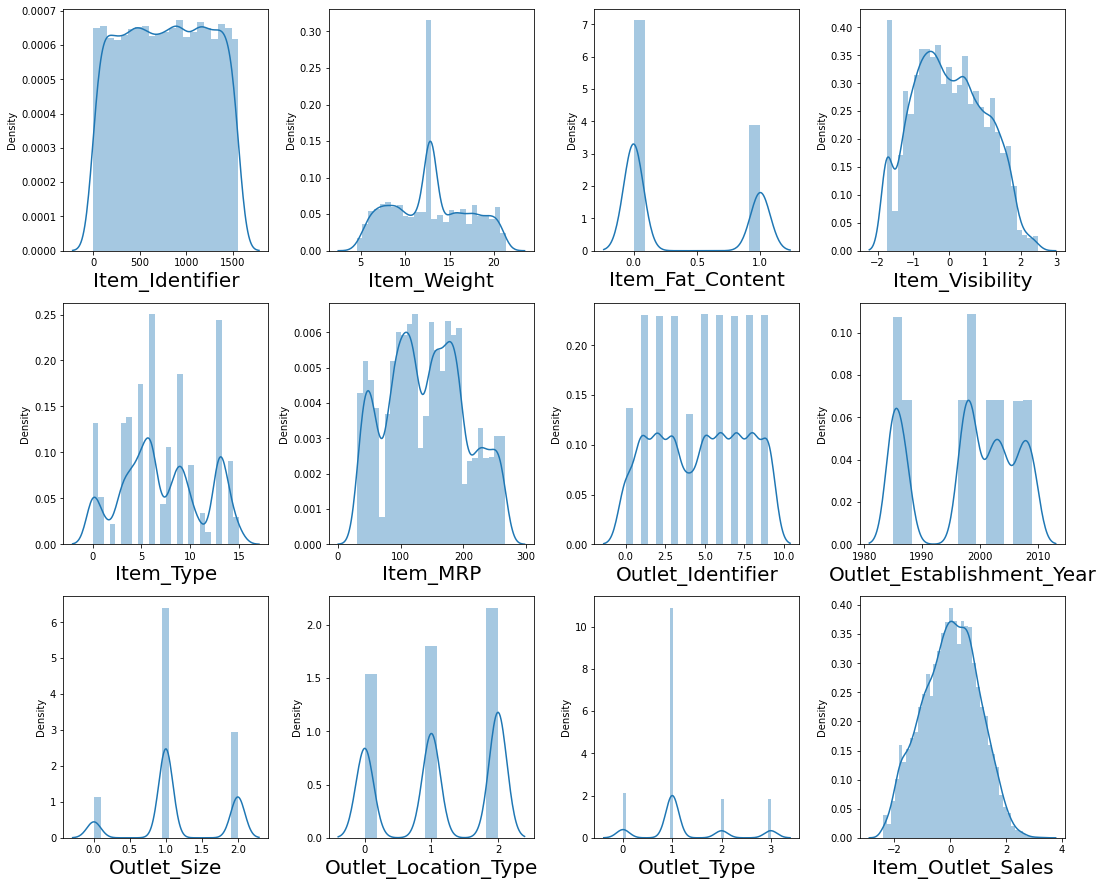

In [38]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Now data looks good lets move further to check multicolinarity by plotting heatmap with correlation method

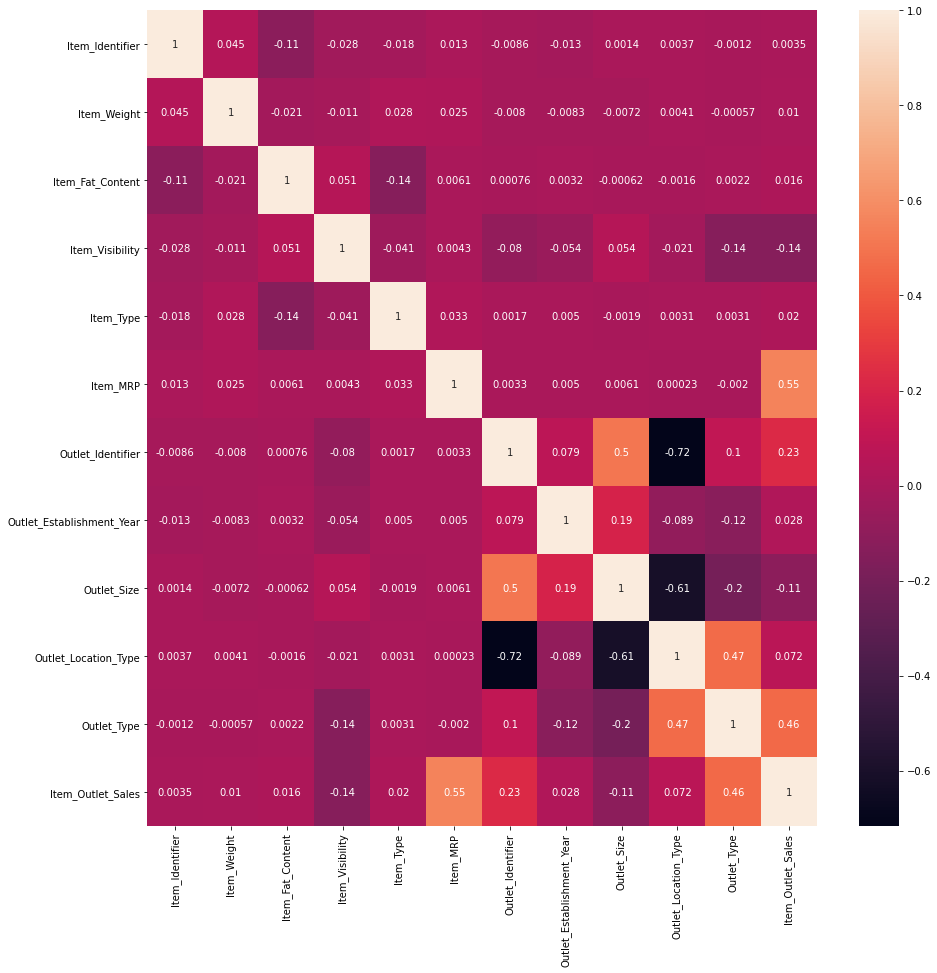

In [39]:
#check multicolinearity
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

From above heatmap it is clear there is no colinarity in in variables lets plot the box plot to see outliers

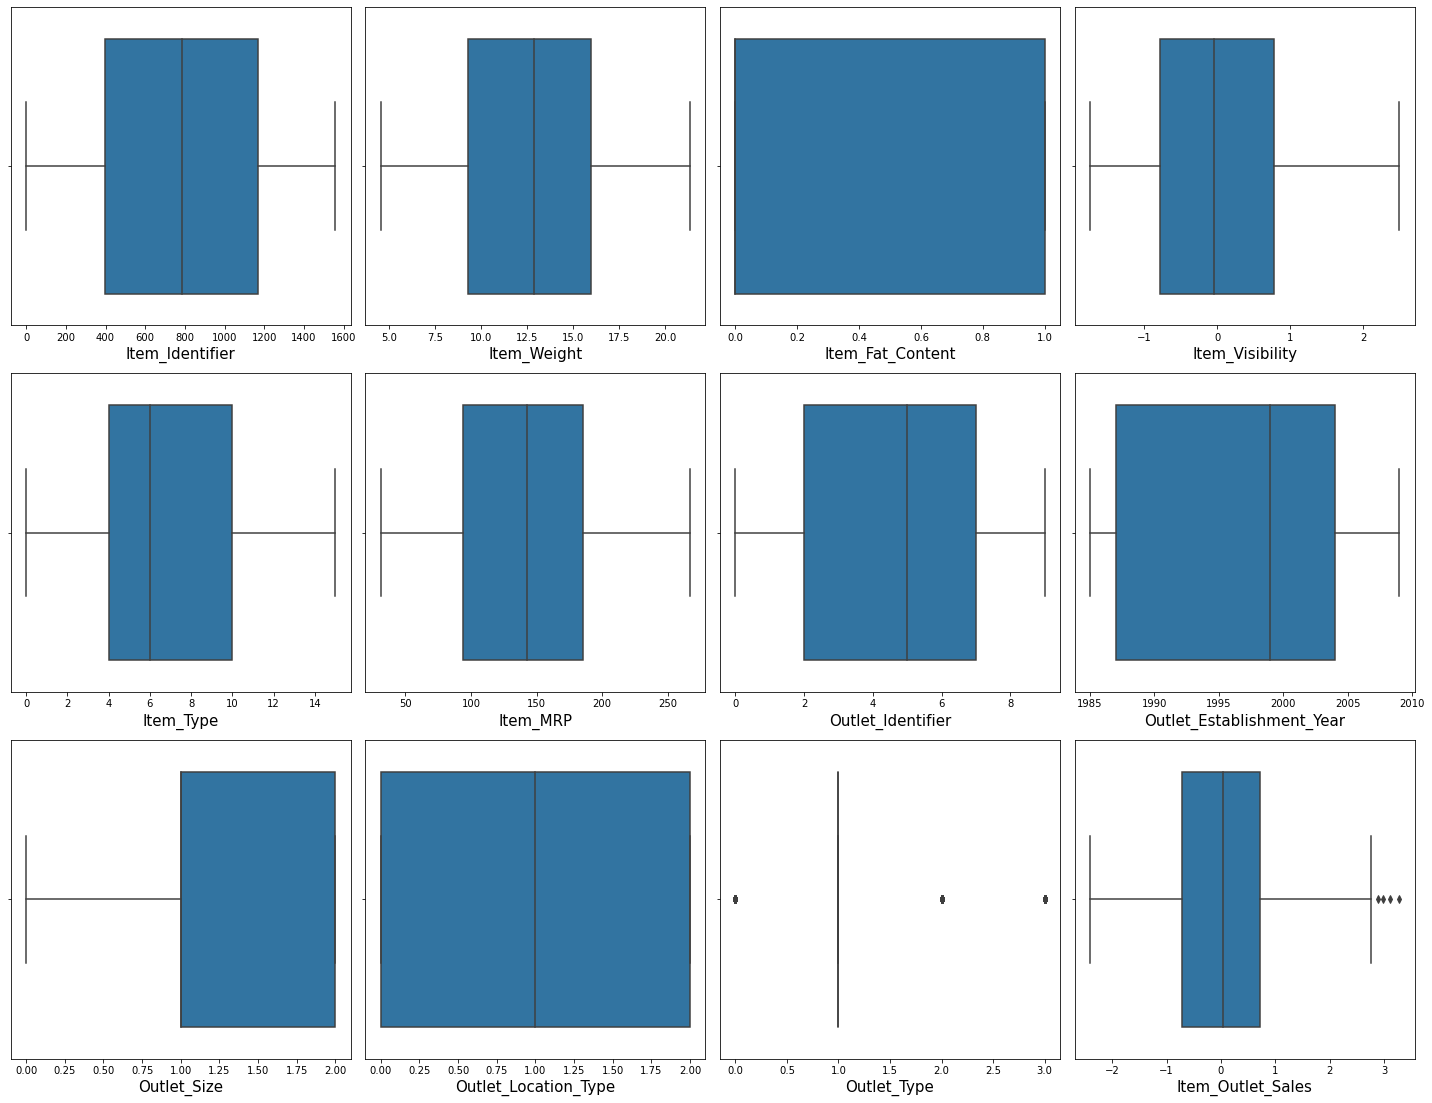

In [40]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=32:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

AS we see there are very less outliers are present in the columns.

In [41]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(data[['Item_Outlet_Sales','Outlet_Type']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [42]:
data.shape

(8521, 12)

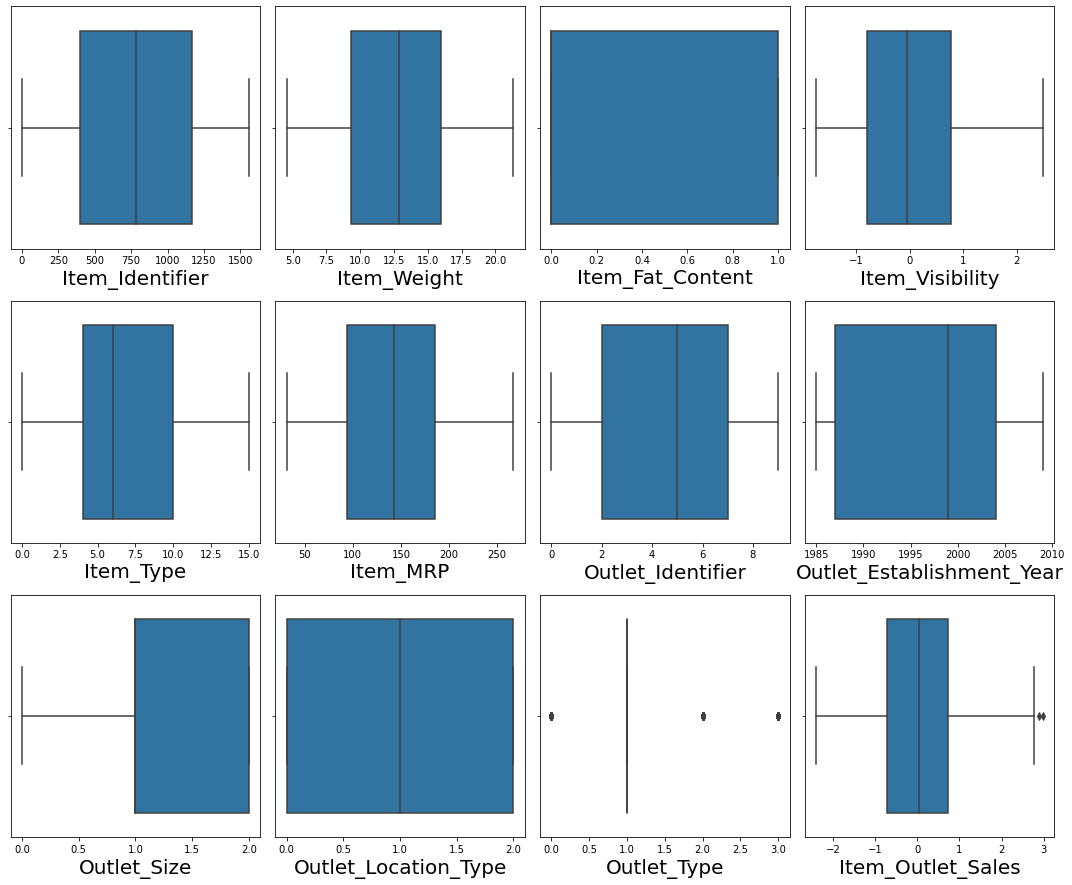

In [43]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

NOw data looks great lets move further and train the model

In [44]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Item_Outlet_Sales'])
y=data['Item_Outlet_Sales']

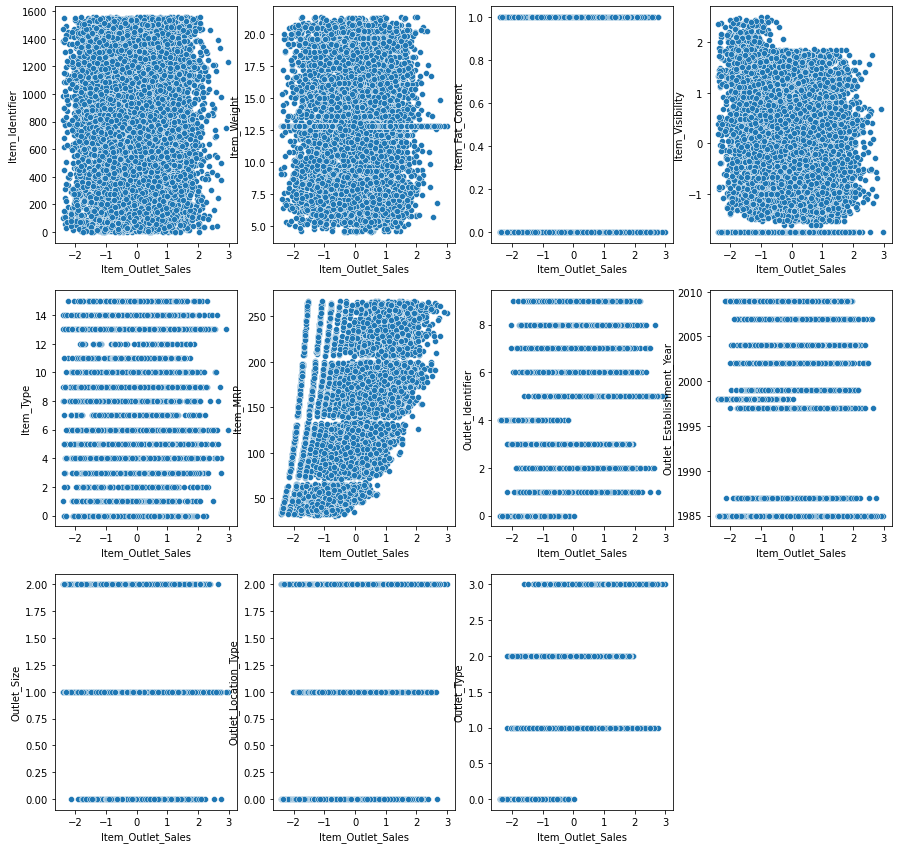

In [45]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

In [46]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [47]:
# Lets select the proper random state to build best model by using LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr= RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.9535792122723517
at random sate 0, the testing accuracy is:- 0.6599253594215257


at random sate 1, the training accuracy is:- 0.9543313614480669
at random sate 1, the testing accuracy is:- 0.6486823105988705


at random sate 2, the training accuracy is:- 0.951658633318752
at random sate 2, the testing accuracy is:- 0.6763224571211822


at random sate 3, the training accuracy is:- 0.9518144868993808
at random sate 3, the testing accuracy is:- 0.6758325922737731


at random sate 4, the training accuracy is:- 0.9533388462302377
at random sate 4, the testing accuracy is:- 0.6569693319726029


at random sate 5, the training accuracy is:- 0.95232977627074
at random sate 5, the testing accuracy is:- 0.6537747148818034


at random sate 6, the training accuracy is:- 0.9531107884732277
at random sate 6, the testing accuracy is:- 0.6576765100287805


at random sate 7, the training accuracy is:- 0.9523609751965325
at random sate 7, the testing accura

at random sate 63, the training accuracy is:- 0.9530338623761351
at random sate 63, the testing accuracy is:- 0.6599883801864543


at random sate 64, the training accuracy is:- 0.9526759294639542
at random sate 64, the testing accuracy is:- 0.6672647831504518


at random sate 65, the training accuracy is:- 0.9523868036893826
at random sate 65, the testing accuracy is:- 0.6681688296898669


at random sate 66, the training accuracy is:- 0.9532722617726641
at random sate 66, the testing accuracy is:- 0.6635531158622854


at random sate 67, the training accuracy is:- 0.9548228605429879
at random sate 67, the testing accuracy is:- 0.6428094795936774


at random sate 68, the training accuracy is:- 0.9522554380606262
at random sate 68, the testing accuracy is:- 0.6676973719931459


at random sate 69, the training accuracy is:- 0.9525729104006992
at random sate 69, the testing accuracy is:- 0.6639286421425656


at random sate 70, the training accuracy is:- 0.9521696788338112
at random sate 70,

at 15,85 random state there is good accuarcy so lets select the 85 random state and lets split the data again

In [48]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=85)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5964, 11)
(5964,)
(2557, 11)
(2557,)


# Lets build the model to predict the sales

In [50]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [51]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [52]:
# Model no.1
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)
model_accuracy(lr)

Train Report: 0.5809943565871357
Test Report: 0.5873775254321763
RMSE: 0.6417085528924013
MAE: 0.5078392943007972
MSE: 0.4117898668552597
Accuracy: 57.53 %
Standard Deviation: 0.07 %


In [53]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.9516328320326783
Test Report: 0.6824537737773606
RMSE: 0.5629435740203003
MAE: 0.43440841766838467
MSE: 0.3169054675307493
Accuracy: 65.54 %
Standard Deviation: 0.65 %


In [54]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.8854411153133188
Test Report: 0.6592233099343383
RMSE: 0.5831715493109577
MAE: 0.45008041368556606
MSE: 0.34008905592574273
Accuracy: 61.40 %
Standard Deviation: 0.30 %


In [55]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.7158573574037901
Test Report: 0.713430654242462
RMSE: 0.5347813511825438
MAE: 0.41173934697636866
MSE: 0.2859910935726272
Accuracy: 67.85 %
Standard Deviation: 0.62 %


In [56]:
#Model no.5
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9337561348465299
Test Report: 0.6525213513092258
RMSE: 0.5888781631585814
MAE: 0.45670621947562107
MSE: 0.3467774910450248
Accuracy: 62.59 %
Standard Deviation: 0.65 %


In [57]:
# Model no.6
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)
model_accuracy(ada)

Train Report: 0.6597471796933949
Test Report: 0.681675497711814
RMSE: 0.5636330128343641
MAE: 0.4381725263510683
MSE: 0.31768217315674235
Accuracy: 65.18 %
Standard Deviation: 0.24 %


In [58]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.1,0.01],'n_estimators':range(10,90,10),'min_samples_split':range(2,10,2)}
grid=GridSearchCV(estimator=gbdt, param_grid=para,cv=2)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [59]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor(learning_rate= 0.1,max_depth=2,min_samples_split=2,n_estimators=80)

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.6991446960803782
Test Report: 0.7169350929824108
RMSE: 0.5315013887495983
MAE: 0.40945247662894535
MSE: 0.28249372624275165
Accuracy: 68.46 %
Standard Deviation: 0.50 %


# after creating diffrent models and based on Kfold cross-validation , accuracy score 68.46 % i am selecting GradientBoostingRegressor with GridSearchCV hypertune parameter is the best model for the sales Prediction

In [76]:
#save model
import pickle
Filename='Finalized_model_BigSales.pickle'
pickle.dump(gbdt,open(Filename,'wb'))

# Lets import the test data for the prediction byusing selected model

In [133]:
df=pd.read_csv('bigdatamart_Test.csv')  # read the data
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [134]:
# check the no. of rows & column & finding the count of missing value
print(df.shape)

print(df.isna().sum())

#printing the summary of data type
df.info() 

(5681, 11)
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null  

As we see in Item_Weight & Outlet_Size columns null values are present so lets treat them frist by using mean & mode method

In [135]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

print(df.shape)

(5681, 11)


No duplicates are found lets treat the null values

In [136]:
# For Item_Weight we are using mean method as our values in numerical form 
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

# For Outlet_Size we are using mode method as our values in str form 
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [137]:
df["Outlet_Size"]=df["Outlet_Size"].replace(np.NaN,"Medium")

# Now lets check foll null values again 
print(df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Now all the null values treated well now lets understand the data

In [138]:
#understand data at high level check the stastics of dataset
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,5681,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,FDK57,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,3468,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.245189,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,9.195000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.695633,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,15.850000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


Observations: 1) null vallues are not present 2) most of columns we have skwed data values 3)we have categorical data type(object type)

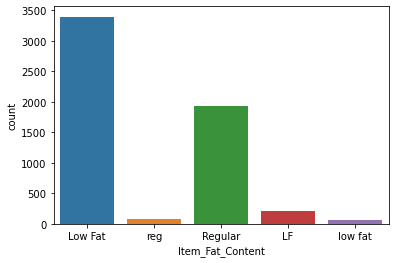

In [139]:
#plot each class frequency
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

From above graph we can see there are most of the products are lowFat products also there are two types of low fat & regular

In [140]:
# combining low Fat,reg, Low fat and, LF

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

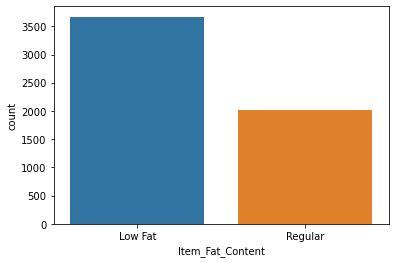

In [141]:
#plot again
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

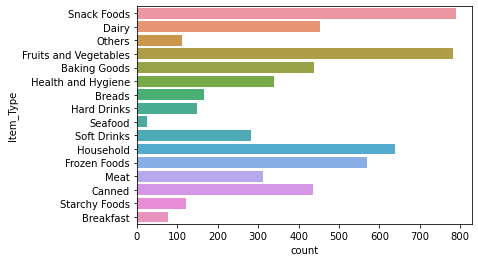

In [142]:
sns.countplot(y='Item_Type',data=df)
plt.show()

From above graph we can see there are maximum( almost 800) items_type is fruits & vegetables and snacks foods. The least product type in the store is seafood.

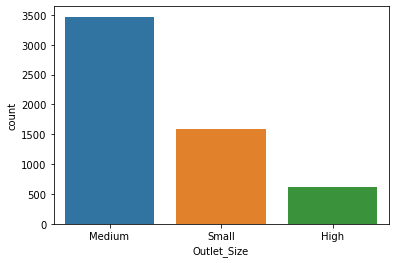

In [143]:
sns.countplot(x='Outlet_Size',data=df)
plt.show()

From above graph we can see there is maximum mediam type of outlets as compare to small & big

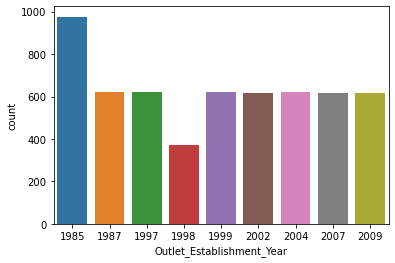

In [144]:
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

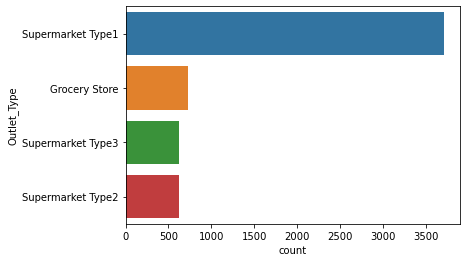

In [145]:
sns.countplot(y='Outlet_Type',data=df)
plt.show()

there are maximum Outlet_Type is supermarket type1

As we have lots of categorical data lets convert into numerical by using encoding tech.

In [146]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=df.columns.values.tolist()
for i in features:
    if df[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [147]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df1=label.fit_transform(df['Item_Identifier'])
pd.Series(df1)
df["Item_Identifier"]=df1

df1=label.fit_transform(df['Item_Fat_Content'])
pd.Series(df1)
df["Item_Fat_Content"]=df1

df1=label.fit_transform(df['Item_Type'])
pd.Series(df1)
df["Item_Type"]=df1

df1=label.fit_transform(df['Outlet_Size'])
pd.Series(df1)
df["Outlet_Size"]=df1

df1=label.fit_transform(df['Outlet_Identifier'])
pd.Series(df1)
df["Outlet_Identifier"]=df1


df1=label.fit_transform(df['Outlet_Location_Type'])
pd.Series(df1)
df["Outlet_Location_Type"]=df1


df1=label.fit_transform(df['Outlet_Type'])
pd.Series(df1)
df["Outlet_Type"]=df1

In [148]:
# Recheck the data
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.30,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.60,0,0.099575,11,241.7538,0,1998,1,2,0


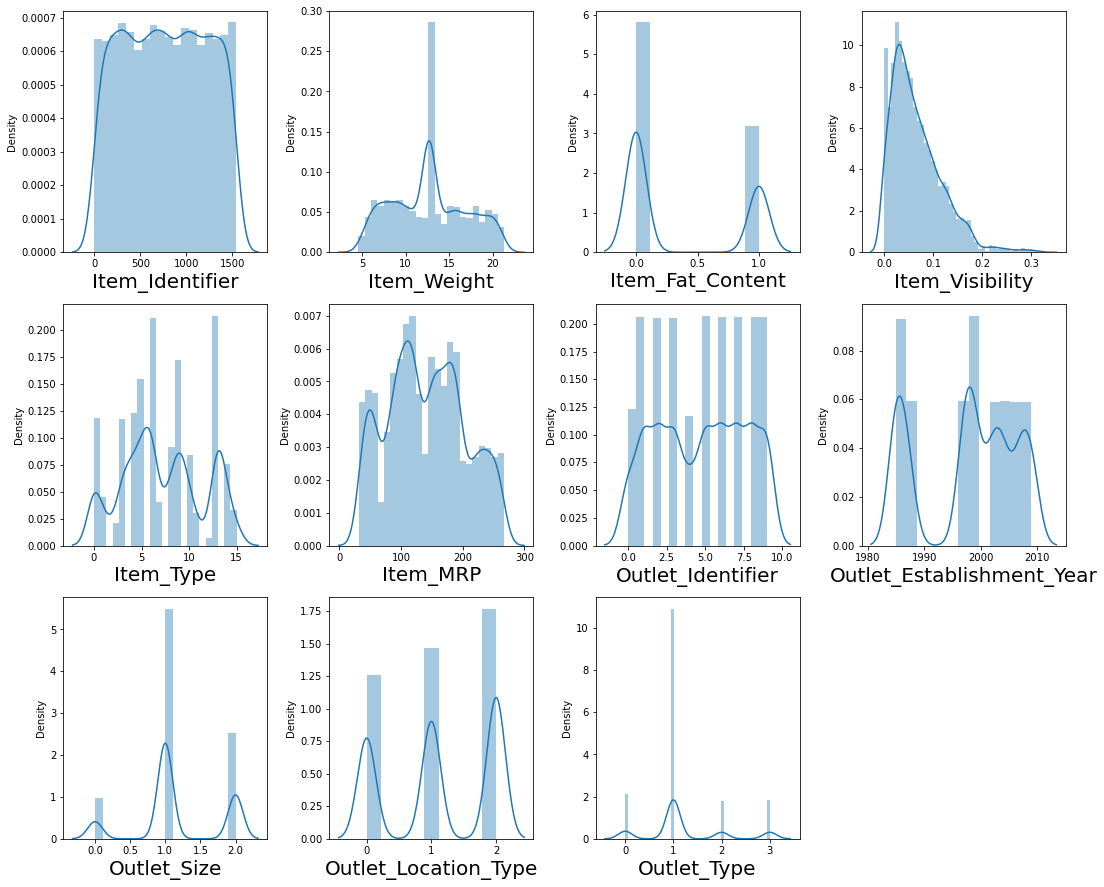

In [149]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from above graph we can see there is skewness is present lets check it again by data.skew method

In [150]:
# Lets check the skewness
df.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

As we know scipy.stats.skew (array, axis=0, bias=True) function calculates the skewness of the data set. skewness = 0 : normally distributed. skewness > 0 : more weight in the left tail of the distribution. skewness < 0 : more weight in the right tail of the distribution.

so from above we can see the weight of Item_Visibility is more than zero so they are right tail skewed data.

Lets use advance tech. to remove this skewness using Power transformation

In [151]:
# Separate the skewed columns
df1=['Item_Visibility']


# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df[df1]=pt.fit_transform(df[df1].values)

df[df1] # rechek data

,Item_Visibility
0,-1.462069
1,-0.448019
2,0.871342
3,-1.175927
4,1.153823
...,...
5676,-1.243150
5677,1.453584
5678,0.397868
5679,-1.760234


In [152]:
print(df.shape) # recheck 
df.head(2)

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75,0,-1.462069,13,107.8622,9,1999,1,0,1
1,1067,8.30,1,-0.448019,4,87.3198,2,2007,1,1,1


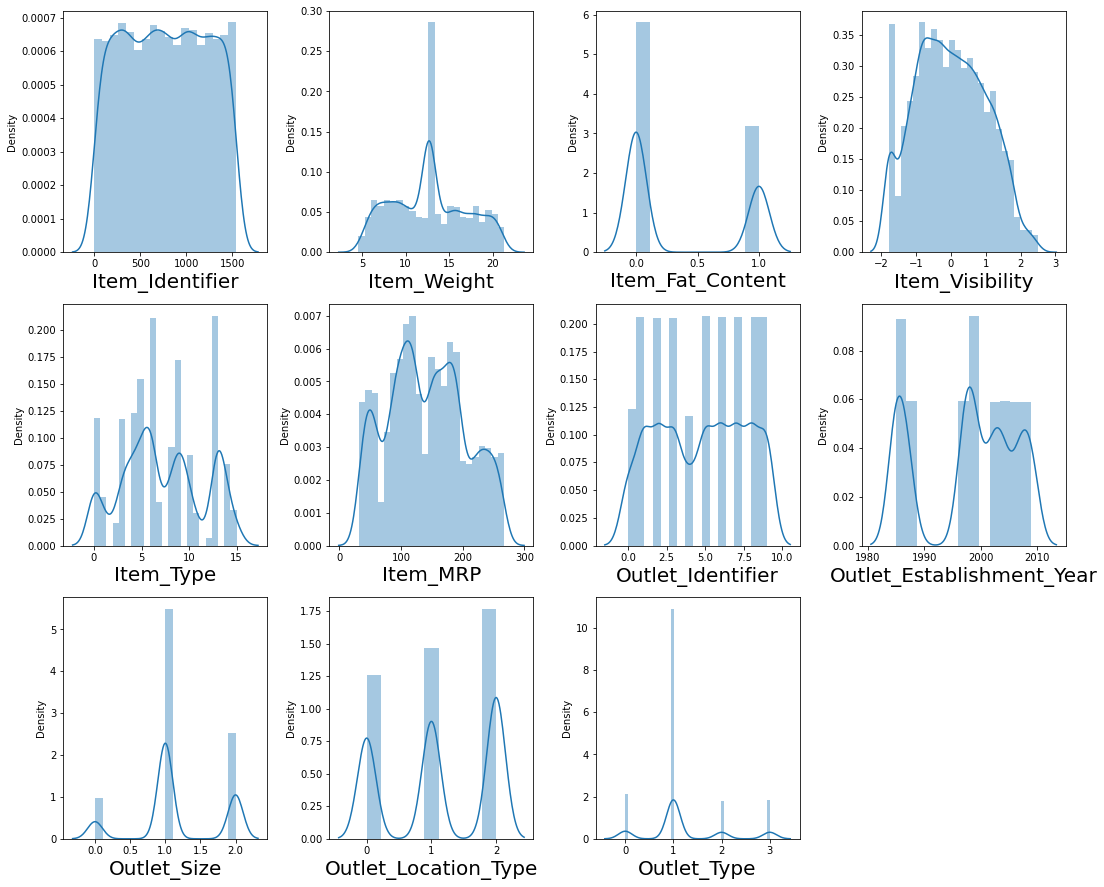

In [153]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Now data looks good lets move further to check multicolinarity by plotting heatmap with correlation method

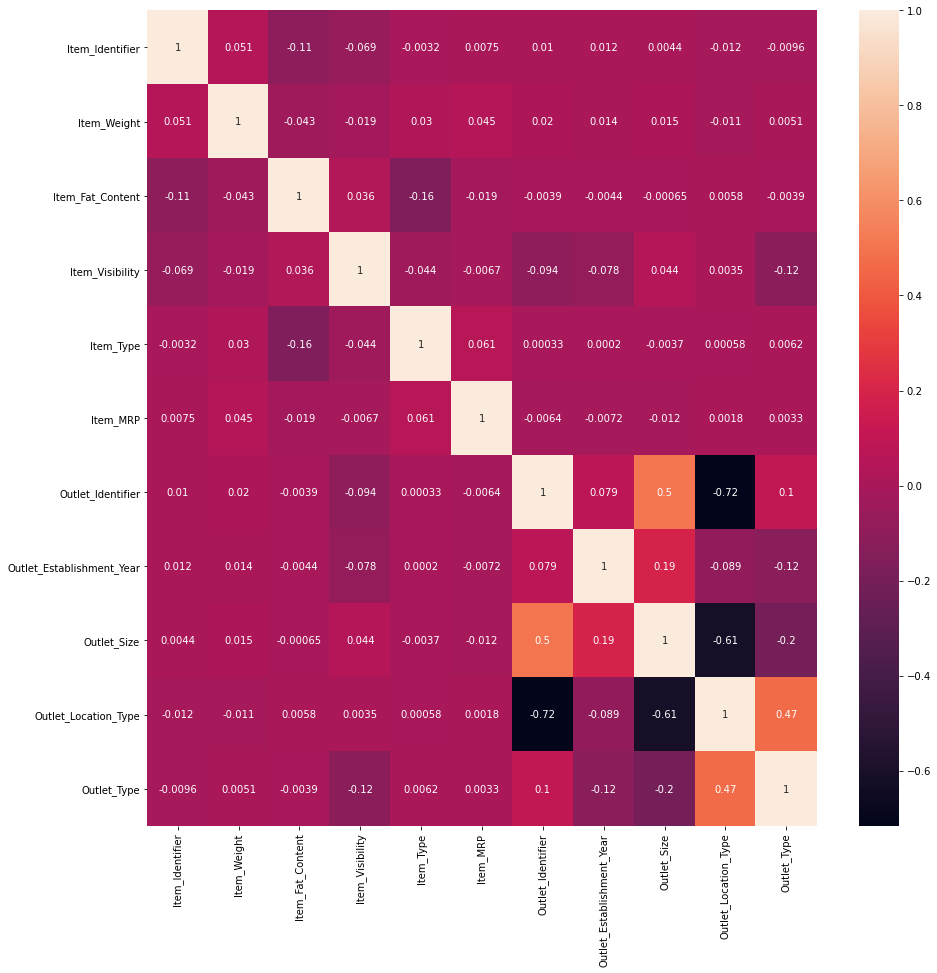

In [154]:
#check multicolinearity
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

From above heatmap it is clear there is no colinarity in in variables lets plot the box plot to see outliers

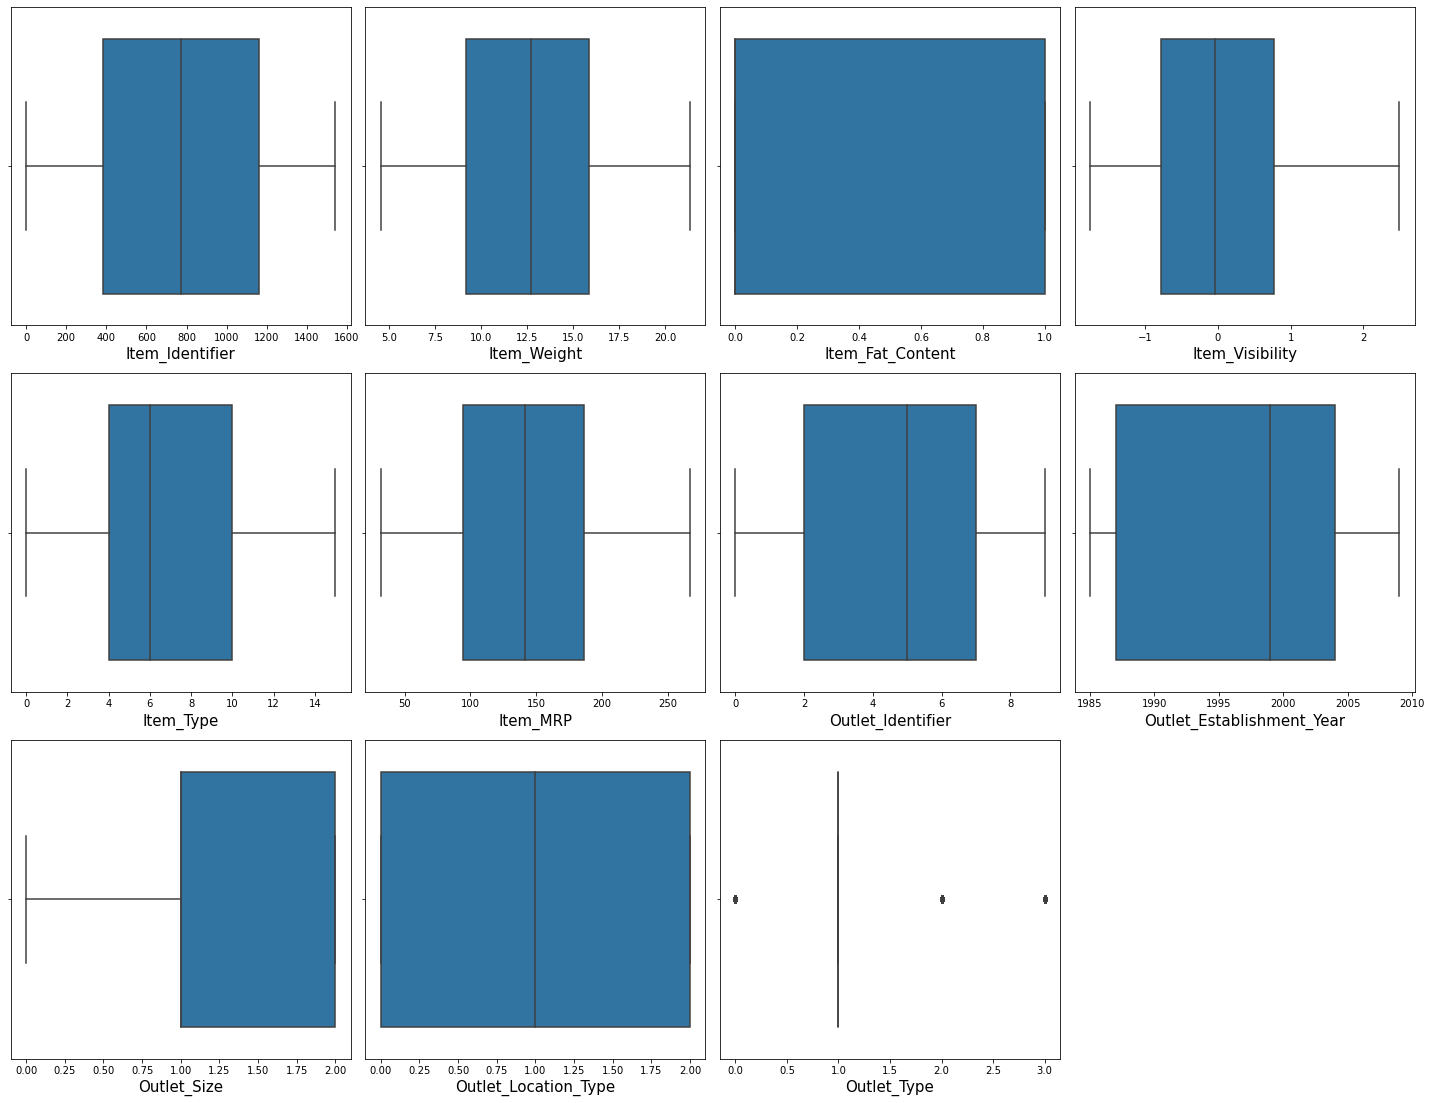

In [155]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=32:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

NO outliers are present so lets move further and predict the target value by selected model

In [158]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# Prediction with selected model

In [159]:
df["predictions"] = df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']].apply(lambda s: gbdt.predict(s.values[None])[0], axis=1)

In [161]:
df["predictions"]

0       0.696759
1       0.700272
2       0.723512
3       0.691029
4       1.206013
          ...   
5676    0.696759
5677    1.206013
5678    0.684654
5679    0.691029
5680    0.694605
Name: predictions, Length: 5681, dtype: float64